## Task 5 Classifiers 

### compare different classifiers on same dataset


#### Model implement was

In [2]:
from sklearn.preprocessing import RobustScaler #robust normlization for outliers
import sklearn.metrics as metrics #metrics librry
import seaborn as sns # for intractve graphs
from sklearn.ensemble import RandomForestClassifier #Random Forest
import matplotlib.pyplot as plt #for visualization
from sklearn.metrics import classification_report

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import IsolationForest #Isolation 

import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

#loading the dataset 
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 9380 non-null   int64  
 1   loc                9380 non-null   float64
 2   v(g)               9380 non-null   float64
 3   ev(g)              9380 non-null   float64
 4   iv(g)              9380 non-null   float64
 5   n                  9380 non-null   float64
 6   v                  9380 non-null   float64
 7   l                  9380 non-null   float64
 8   d                  9380 non-null   float64
 9   i                  9380 non-null   float64
 10  e                  9380 non-null   float64
 11  b                  9380 non-null   float64
 12  t                  9380 non-null   float64
 13  lOCode             9380 non-null   float64
 14  lOComment          9380 non-null   float64
 15  lOBlank            9380 non-null   float64
 16  locCodeAndComment  9380 

,Id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,Category
0,8255,25.0,4.0,1.0,4.0,82.0,385.44,0.07,15.00,25.70,...,17.0,0.0,3.0,0.0,13.0,13.0,52.0,30.0,7.0,0
1,7507,40.0,12.0,12.0,12.0,146.0,806.44,0.06,17.29,46.63,...,36.0,0.0,2.0,0.0,17.0,29.0,87.0,59.0,23.0,0
2,6758,52.0,2.0,1.0,2.0,227.0,981.08,0.01,86.33,11.36,...,36.0,3.0,10.0,0.0,14.0,6.0,153.0,74.0,3.0,0
3,19,85.0,9.0,1.0,7.0,277.0,1714.58,0.03,32.64,52.53,...,69.0,0.0,14.0,0.0,26.0,47.0,161.0,118.0,13.0,1
4,1299,38.0,4.0,1.0,1.0,210.0,1117.60,0.04,24.23,46.12,...,29.0,0.0,7.0,0.0,14.0,26.0,120.0,90.0,7.0,1


In [4]:
#convert data into numpy arrays
id_person=df_train.iloc[:,0].values # column of customer id
X = df_train.iloc[:,1:-1].values # column of the inputs
y = df_train.iloc[:,-1].values # column of the output
X

array([[ 25.,   4.,   1., ...,  52.,  30.,   7.],
       [ 40.,  12.,  12., ...,  87.,  59.,  23.],
       [ 52.,   2.,   1., ..., 153.,  74.,   3.],
       ...,
       [ 20.,   2.,   1., ...,  61.,  24.,   3.],
       [ 33.,   4.,   3., ...,  54.,  36.,   7.],
       [292.,  37.,  11., ..., 384., 249.,  71.]])

## Model comparasion


In this part, 12 models are compared with same dataset,
To maxinum the accuracy, 10-fold method is used on test dataset.

C:\Users\curly\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\curly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\curly\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\curly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

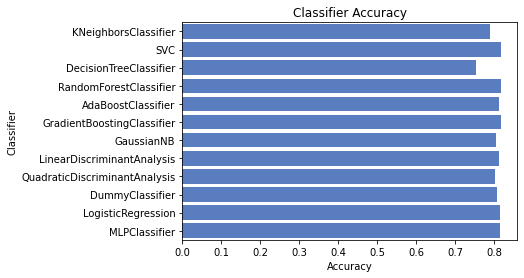

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),DummyClassifier(strategy="most_frequent"),
    LogisticRegression(),MLPClassifier(hidden_layer_sizes=(3,),max_iter=500000,activation="logistic",solver="lbfgs", random_state=42)]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
k_fold = KFold(n_splits=10,  shuffle=True, random_state=42)
acc_dict = {}
#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
  #  y_train, y_test = y[train_index], y[test_index]
for train_indices, test_indices in k_fold.split(X):
    X_train, X_test, y_train, y_test =X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    scalerX = StandardScaler()
    scalerX.fit(X_train)
    X_train_n = scalerX.transform(X_train)
    X_test_n  = scalerX.transform(X_test )
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train_n, y_train)
        train_predictions = clf.predict(X_test_n)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Although the defination of classifiers are different, most of them have similar accuracy when trained with same dataset(10-fold).
Among them, decision tree shows worest accuracy but its' improvment model random forest was the one of best accuracy models.
This is also an support evidence that Ensemble Learning model can perform better tha base model.
